## Lab01: Word2Vec, Glove, PCA visualization

Course: Big data processing

Student: Maryam Ospanova (ML&DS, PhD)
______________________________________________________________________________

### Word2Vec implementation

Description of the considered text

In [1]:
corpus = [    
    "You can treat lists of a list as matrix in Python. However, there is a better way of working Python matrices using NumPy package."
    "In Python, list is a type of container in Data Structures, which is used to store multiple data at the same time. Unlike Sets, the list in Python are ordered and have a definite count."
]

Processing of the text

In [2]:
tokens = []
for i in range (len(corpus)):
    sents = corpus[i].split(".")    
    for j in range(len(sents)):
        tokens = tokens + sents[j].lower().split(" ")

Collecting the unique entries of the text

In [3]:
my_dict = list(set(tokens))   
my_dict[:10]

['',
 'using',
 'package',
 'unlike',
 'ordered',
 'there',
 'time',
 'sets,',
 'python',
 'in']

Description of the functions to get a Word by an Index, and vice versa

In [4]:
def word2idx(token):
    index = my_dict.index(token)
    return index
def idx2word(index):
    word = my_dict[index]
    return word

In [5]:
word2idx("store")

21

In [6]:
idx2word(3)

'unlike'

Co-occurance matrix calculation

In [7]:
import numpy as np
n = len(my_dict)

coMatrix = np.zeros((n,n))

for idx in range (len(tokens)-1):
    ind2 = word2idx(tokens[idx+1])
    ind1 = word2idx(tokens[idx])
    print(tokens[idx],tokens[idx+1])
    coMatrix[ind1,ind2] +=1

you can
can treat
treat lists
lists of
of a
a list
list as
as matrix
matrix in
in python
python 
 however,
however, there
there is
is a
a better
better way
way of
of working
working python
python matrices
matrices using
using numpy
numpy package
package in
in python,
python, list
list is
is a
a type
type of
of container
container in
in data
data structures,
structures, which
which is
is used
used to
to store
store multiple
multiple data
data at
at the
the same
same time
time 
 unlike
unlike sets,
sets, the
the list
list in
in python
python are
are ordered
ordered and
and have
have a
a definite
definite count
count 


In [8]:
coMatrix[:10, :10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0.]])

In [9]:
coMatrix_update = np.dot(coMatrix,coMatrix.T)
coMatrix_update[:10,:10]

array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 6.]])

_______________________________________________

### PCA visualization

Importing modules and attributes:

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
def calc_matrix(random_words,dim =20):
    word_matrix = np.random.randn(len(random_words),dim)
    i = 0
    for word in random_words:
        word_matrix[i] = word2idx(word)
        i +=1
    return word_matrix

In [12]:
random_words = ['list', 'a', 'the', 'python', 'container', 'package', 'which', 'is', 'used', 'to', 'store', 'multiple', 'data', 'at', 'the', 'same']
matrix = calc_matrix(random_words, 20)
matrix[:10,:10]

array([[19., 19., 19., 19., 19., 19., 19., 19., 19., 19.],
       [12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
       [24., 24., 24., 24., 24., 24., 24., 24., 24., 24.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.],
       [22., 22., 22., 22., 22., 22., 22., 22., 22., 22.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [34., 34., 34., 34., 34., 34., 34., 34., 34., 34.],
       [18., 18., 18., 18., 18., 18., 18., 18., 18., 18.],
       [43., 43., 43., 43., 43., 43., 43., 43., 43., 43.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15.]])

In [13]:
pca_ = PCA(n_components = 2)   #x and y axis
data = pca_.fit_transform(matrix) 

In [14]:
data

array([[-1.31368994e+01,  2.36242710e-15],
       [-4.44418511e+01,  3.03671722e-14],
       [ 9.22378041e+00, -4.27723449e-15],
       [-6.23303949e+01,  8.44199045e-15],
       [ 2.79508497e-01, -1.44369233e-16],
       [-8.91632106e+01, -1.75202682e-14],
       [ 5.39451400e+01, -8.33114850e-15],
       [-1.76090353e+01,  7.85083340e-15],
       [ 9.41943636e+01,  1.32984547e-14],
       [-3.10254432e+01,  2.60345167e-14],
       [-4.19262746e+00,  1.78679945e-15],
       [ 1.81680523e+01, -2.40157552e-16],
       [ 4.50008680e+01,  8.40831631e-15],
       [ 4.75164445e+00,  6.29740955e-16],
       [ 9.22378041e+00, -4.27723449e-15],
       [ 2.71123242e+01,  7.25967635e-15]])

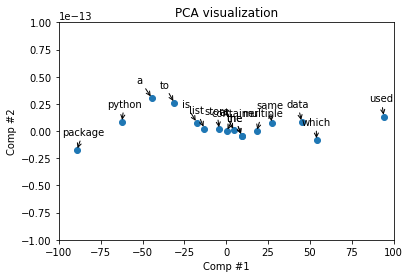

In [15]:
plt.title('PCA visualization')
plt.xlim(-100,100)
plt.ylim(-(1e-13),1e-13)
plt.xlabel('Comp #1')
plt.ylabel('Comp #2')

plt.scatter(data[:,0], data[:,1], cmap='Bl')
for label, x, y in zip(random_words, data[:,0], data[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-15,15), textcoords='offset points', arrowprops=dict(arrowstyle = '->'))